In [1]:
# Blog : https://www.datacamp.com/community/tutorials/scikit-learn-tutorial-baseball-1
# Blog : https://www.datacamp.com/community/tutorials/scikit-learn-tutorial-baseball-2

In [2]:
### Importing Data

In [3]:
# import pandas and sqlite3
import pandas as pd
import sqlite3

# Connecting to SQLite Database
conn = sqlite3.connect('lahman2016.sqlite')

In [4]:
# Querying Database for all seasons where a team played 150 or more games
# and is still active today.
query = '''
select * from Teams
inner join TeamsFranchises
on Teams.franchID == TeamsFranchises.franchID
where Teams.G >= 150 and TeamsFranchises.active == 'Y';
'''

# Creating dataframe from query.
Teams = conn.execute(query).fetchall()

In [5]:
# Convert Teams to DataFrame
teams_df = pd.DataFrame(Teams)

# print out first 5 rows
print(teams_df.head())

     0   1    2    3     4   5    6     7   8   9   ...       42   43   44  \
0  1961  AL  LAA  ANA  None   8  162  82.0  70  91  ...   603510  111  112   
1  1962  AL  LAA  ANA  None   3  162  81.0  86  76  ...  1144063   97   97   
2  1963  AL  LAA  ANA  None   9  161  81.0  70  91  ...   821015   94   94   
3  1964  AL  LAA  ANA  None   5  162  81.0  82  80  ...   760439   90   90   
4  1965  AL  CAL  ANA  None   7  162  80.0  75  87  ...   566727   97   98   

    45   46   47   48                             49  50    51  
0  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  None  
1  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  None  
2  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  None  
3  LAA  LAA  LAA  ANA  Los Angeles Angels of Anaheim   Y  None  
4  CAL  CAL  CAL  ANA  Los Angeles Angels of Anaheim   Y  None  

[5 rows x 52 columns]


In [6]:
### Cleaning and Preparing The Data

In [7]:
# Adding column names to dataframe
cols = ['yearID','lgID','teamID','franchID','divID','Rank','G','Ghome','W','L','DivWin','WCWin','LgWin','WSWin','R','AB','H','2B','3B','HR','BB','SO','SB','CS','HBP','SF','RA','ER','ERA','CG','SHO','SV','IPouts','HA','HRA','BBA','SOA','E','DP','FP','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID','franchName','active','NAassoc']
teams_df.columns = cols

# Print the first rows of 'teams_df'
print(teams_df.head())

# Print the length of 'teams_df'
print(len(teams_df))

   yearID lgID teamID  franchID divID  Rank    G  Ghome   W   L  ...  \
0    1961   AL    LAA       ANA  None     8  162   82.0  70  91  ...   
1    1962   AL    LAA       ANA  None     3  162   81.0  86  76  ...   
2    1963   AL    LAA       ANA  None     9  161   81.0  70  91  ...   
3    1964   AL    LAA       ANA  None     5  162   81.0  82  80  ...   
4    1965   AL    CAL       ANA  None     7  162   80.0  75  87  ...   

  attendance  BPF  PPF teamIDBR  teamIDlahman45  teamIDretro  franchID  \
0     603510  111  112      LAA             LAA          LAA       ANA   
1    1144063   97   97      LAA             LAA          LAA       ANA   
2     821015   94   94      LAA             LAA          LAA       ANA   
3     760439   90   90      LAA             LAA          LAA       ANA   
4     566727   97   98      CAL             CAL          CAL       ANA   

                      franchName  active  NAassoc  
0  Los Angeles Angels of Anaheim       Y     None  
1  Los Angeles Ang

In [8]:
# Dropping you unnecessary column variables
drop_cols = ['lgID','franchID','divID','Rank','Ghome','L','DivWin','WCWin','LgWin','WSWin','SF','name','park','attendance','BPF','PPF','teamIDBR','teamIDlahman45','teamIDretro','franchID','franchName','active','NAassoc']

df = teams_df.drop(drop_cols, axis = 1)

# Print out first rows of 'df'
print(df.head())

   yearID teamID    G   W    R    AB     H   2B  3B   HR  ...  SHO  SV  \
0    1961    LAA  162  70  744  5424  1331  218  22  189  ...    5  34   
1    1962    LAA  162  86  718  5499  1377  232  35  137  ...   15  47   
2    1963    LAA  161  70  597  5506  1378  208  38   95  ...   13  31   
3    1964    LAA  162  82  544  5362  1297  186  27  102  ...   28  41   
4    1965    CAL  162  75  527  5354  1279  200  36   92  ...   14  33   

   IPouts    HA  HRA  BBA  SOA    E     DP     FP  
0    4314  1391  180  713  973  192  154.0  0.969  
1    4398  1412  118  616  858  175  153.0  0.972  
2    4365  1317  120  578  889  163  155.0  0.974  
3    4350  1273  100  530  965  138  168.0  0.978  
4    4323  1259   91  563  847  123  149.0  0.981  

[5 rows x 29 columns]


In [10]:
# Print out null values of all columns of 'df'
print(df.isnull().sum(axis = 0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 419, 1777, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 22, 0]


In [11]:
# Eliminating columns with null values
df = df.drop(['CS', 'HBP'], axis = 1)

# Filling null values
df['SO'] = df['SO'].fillna(df['SO'].median())
df['DP'] = df['DP'].fillna(df['DP'].median())

# Print out null values of all columns of 'df'
print(df.isnull().sum(axis = 0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [12]:
### Exploring and Visualizing The Data

Text(0.5, 1.0, 'Distribution of Wins')

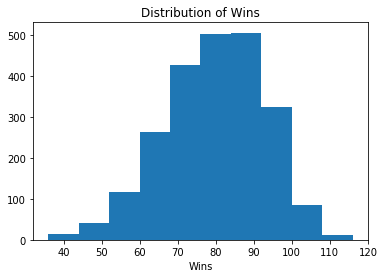

In [13]:
# import the pyplot module from matplotlib
import matplotlib.pyplot as plt

# matplotlib plots inline
%matplotlib inline

# Plotting distribution of wins
plt.hist(df['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

In [14]:
print(df['W'].mean())

79.23043288150416


In [17]:
# Creating bins for the win column
def assign_win_bins(W):
    if W < 50:
        return 1
    if W >= 50 and W <=69:
        return 2
    if W >= 70 and W <= 89:
        return 3
    if W >= 90 and W <= 109:
        return 4
    if W >= 110:
        return 5

# Apply 'assign_win_bins' to df['W']
df['win_bins'] = df['W'].apply(assign_win_bins)

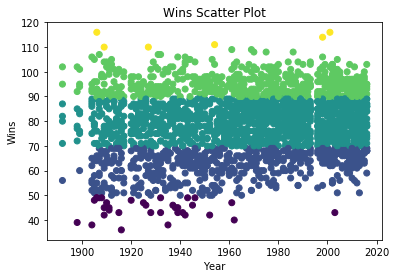

In [18]:
# Plotting scatter graph of Year vs. Wins
plt.scatter(df['yearID'], df['W'], c = df['win_bins'])
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')

plt.show()

In [19]:
# Filter for rows where 'yearID' is greater than 1900
df = df[df['yearID'] > 1900]

In [20]:
# Create runs per year and games per year dictionaries
runs_per_year = {}
games_per_year = {}

for i, row in df.iterrows():
    year = row['yearID']
    runs = row['R']
    games = row['G']
    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games

print(runs_per_year)
print(games_per_year)

{1961: 12942, 1962: 14461, 1963: 12780, 1964: 13124, 1965: 12946, 1966: 12900, 1967: 12210, 1968: 11109, 1969: 15850, 1970: 16880, 1971: 15073, 1972: 13706, 1973: 16376, 1974: 16046, 1975: 16295, 1976: 15492, 1977: 18803, 1978: 17251, 1979: 18713, 1980: 18053, 1982: 18110, 1983: 18170, 1984: 17921, 1985: 18216, 1986: 18545, 1987: 19883, 1988: 17380, 1989: 17405, 1990: 17919, 1991: 18127, 1992: 17341, 1993: 20864, 1996: 22831, 1997: 21604, 1998: 23297, 1999: 24691, 2000: 24971, 2001: 23199, 2002: 22408, 2003: 22978, 2004: 23376, 2005: 22325, 2006: 23599, 2007: 23322, 2008: 22585, 2009: 22419, 2010: 21308, 2011: 20808, 2012: 21017, 2013: 20255, 2014: 19761, 2015: 20647, 2016: 21744, 1904: 9307, 1905: 9640, 1906: 8322, 1907: 8186, 1908: 8423, 1909: 8805, 1910: 9580, 1911: 11164, 1912: 11154, 1913: 9964, 1914: 9408, 1915: 9444, 1916: 8889, 1917: 8948, 1920: 10762, 1921: 11935, 1922: 12059, 1923: 11874, 1924: 11722, 1925: 12596, 1926: 11443, 1927: 11745, 1928: 11645, 1929: 12747, 1930: 1369

In [21]:
# Create MLB runs per game (per year) dictionary
mlb_runs_per_game = {}
for k, v in games_per_year.items():
    year = k
    games = v
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs / games

print(mlb_runs_per_game)

{1961: 4.525174825174825, 1962: 4.460518198642813, 1963: 3.9468807906114884, 1964: 4.035670356703567, 1965: 3.9882932840418976, 1966: 3.9938080495356036, 1967: 3.7685185185185186, 1968: 3.4181538461538463, 1969: 4.07245632065776, 1970: 4.341563786008231, 1971: 3.8888028895768834, 1972: 3.6863905325443787, 1973: 4.214101904271745, 1974: 4.124935732647815, 1975: 4.21277145811789, 1976: 3.99484270242393, 1977: 4.470518307180218, 1978: 4.103472882968601, 1979: 4.457598856598381, 1980: 4.2881235154394295, 1982: 4.297579496915045, 1983: 4.307728781412992, 1984: 4.256769596199525, 1985: 4.330955777460771, 1986: 4.409177365668093, 1987: 4.722802850356294, 1988: 4.1380952380952385, 1989: 4.132241215574549, 1990: 4.256294536817102, 1991: 4.307747148288973, 1992: 4.1170465337132, 1993: 4.597620096959012, 1996: 5.0355094838994265, 1997: 4.766990291262136, 1998: 4.789679276315789, 1999: 5.0846375617792425, 2000: 5.140181144503911, 2001: 4.7754219843557015, 2002: 4.6183017312448476, 2003: 4.72798353

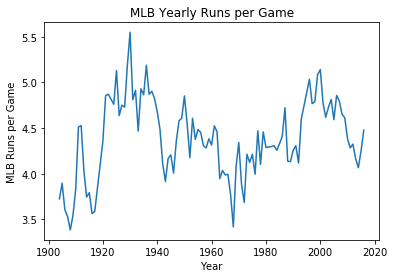

In [22]:
# Create lists from mlb_runs_per_game dictionary
lists = sorted(mlb_runs_per_game.items())
x, y = zip(*lists)

# Create line plot of Year vs. MLB runs per Game
plt.plot(x, y)
plt.title('MLB Yearly Runs per Game')
plt.xlabel('Year')
plt.ylabel('MLB Runs per Game')

plt.show()

In [23]:
### Adding New Features

In [ ]:
# Creating 'year_label' column, which will give your algorithm
# information about how certain years are related
# (Dead ball eras, Live ball/Steroid Eras)

def assign_label(year):
    if year < 1920:
        return 1
    elif year >= 1920 and year <= 1941:
        return 2
    elif year >=